In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [2]:
df = pd.read_csv('auto-mpg.data', delimiter=r'\s+', header=None)
df = df.iloc[:, :-1]
df.iloc[df.loc[:, 3] == '?', 3] = np.nan
df[3] = df[3].astype('float64')

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# auto-mpg
si = SimpleImputer(strategy='mean', missing_values=np.nan)
df[3] = si.fit_transform(df[[3]])
df = pd.get_dummies(df, columns=[7], dtype='uint8')

In [4]:
si = SimpleImputer(strategy='mean', missing_values=0)

In [5]:
impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[impute_features] = si.fit_transform(df[impute_features])

In [5]:
dataset = df.to_numpy()

In [6]:
# this is for auto-mpg
dataset_x = dataset[:, 1:]
dataset_y = dataset[:, 0]

In [7]:
dataset_x = dataset[:, :-1]
dataset_y = dataset[:, -1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

In [9]:
# auto-mpg
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(training_dataset_x)
scaled_training_dataset_x = ss.transform(training_dataset_x)
scaled_test_dataset_x = ss.transform(test_dataset_x)

In [14]:
from tensorflow.keras.callbacks import Callback

In [12]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        loss = logs['loss']
        val_loss = logs['val_loss']
        print(f'epoch: {epoch}, loss: {loss}, val_loss: {val_loss}')

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Normalization, Dense

In [11]:
model = Sequential(name='Auto-MPG')

model.add(Input((training_dataset_x.shape[1],)))
model.add(Dense(32, activation='relu', name='Hidden-1'))
model.add(Dense(32, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))
model.summary()

Model: "Auto-MPG"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-1 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-2 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# auto-mpg
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
hist = model.fit(scaled_training_dataset_x, training_dataset_y, batch_size=32, epochs=200, validation_split=0.2)
eval_result = model.evaluate(scaled_test_dataset_x, test_dataset_y, batch_size=32)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 589.6425 - mae: 23.0068 - val_loss: 516.8085 - val_mae: 21.5115
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 525.6794 - mae: 21.5180 - val_loss: 494.1866 - val_mae: 20.9411
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 526.9733 - mae: 21.4226 - val_loss: 471.9748 - val_mae: 20.3657
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 514.5228 - mae: 21.0660 - val_loss: 448.4218 - val_mae: 19.7438
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483.2491 - mae: 20.1827 - val_loss: 422.6974 - val_mae: 19.0533
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 455.0865 - mae: 19.6122 - val_loss: 394.6219 - val_mae: 18.2796
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 437.4565 - mae: 19.1061 - val_loss: 364.0265 - val_mae: 17.4108
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 418.4560 - mae: 18.6753 - val_loss: 331.3795 - val_mae: 16.5057
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━

In [17]:
mins = np.min(training_dataset_x, axis=0)
maxmin_diffs = np.max(training_dataset_x, axis=0) - np.min(training_dataset_x, axis=0)

In [28]:
norm_layer = Normalization()  # Standard Scalar
norm_layer.adapt(training_dataset_x)

In [18]:
norm_layer = Normalization(mean=mins, variance=maxmin_diffs ** 2)   # minmax scalar

In [30]:
model = Sequential(name='Diabetes')

In [ ]:
model.add(Input((training_dataset_x.shape[1],)))
model.add(norm_layer)
model.add(Dense(16, activation='relu', name='Hidden-1'))
model.add(Dense(16, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

In [17]:
mycallback = MyCallback()

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[mycallback], verbose=0)

In [24]:
def on_epoch_end_proc(epoch, logs):
    pass
def on_batch_begin_proc(batch, logs):
    pass
def on_batch_end_proc(batch, logs):
    pass

from tensorflow.keras.callbacks import LambdaCallback

lambda_callback = LambdaCallback(on_epoch_end=on_epoch_end_proc, on_batch_begin=on_batch_begin_proc, on_batch_end=on_batch_end_proc)
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[lambda_callback], verbose=0)

In [16]:
class MyLambdaCallback(Callback):
    def __init__(self, on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None,  on_batch_end=None):
        self._on_epoch_begin = on_epoch_begin
        self._on_epoch_end = on_epoch_end
        self._on_batch_begin = on_batch_begin
        self._on_batch_end = on_batch_end
        
    def on_epoch_begin(self, epoch, logs):
        if self._on_epoch_begin:
            self._on_epoch_begin(epoch, logs)
    
    def on_epoch_end(self, epoch, logs):
        if self._on_epoch_end:
            self._on_epoch_end(epoch, logs)
    
    def on_batch_begin(self, batch, logs):
        if self._on_batch_begin:
            self._on_batch_begin(batch, logs)
                
    def on_batch_end(self, batch, logs):
        if self._on_batch_end:
            self._on_batch_end(batch, logs)


In [18]:
batch_losses= []

In [19]:
def on_epoch_begin_proc(epoch, logs):
    global batch_losses
    batch_losses = []
    print(f'eopch: {epoch}')    


def on_epoch_end_proc(epoch, logs):
    loss = logs['loss']
    val_loss = logs['val_loss']
    print(f'\nepoch: {epoch}, loss: {loss}, val_loss: {val_loss}')
    print(f'batch mean: {np.mean(batch_losses)}')
    print('-' * 30)
  
def on_batch_end_proc(batch, logs):
    global total
    loss = logs['loss']
    batch_losses.append(loss)
    print(f'\t\tbatch: {batch}, loss: {loss}')

In [20]:
mylambda_callback = MyLambdaCallback(on_epoch_begin=on_epoch_begin_proc, on_epoch_end=on_epoch_end_proc, on_batch_end=on_batch_end_proc)

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[mylambda_callback], verbose=0)

In [14]:
import matplotlib.pyplot as plt

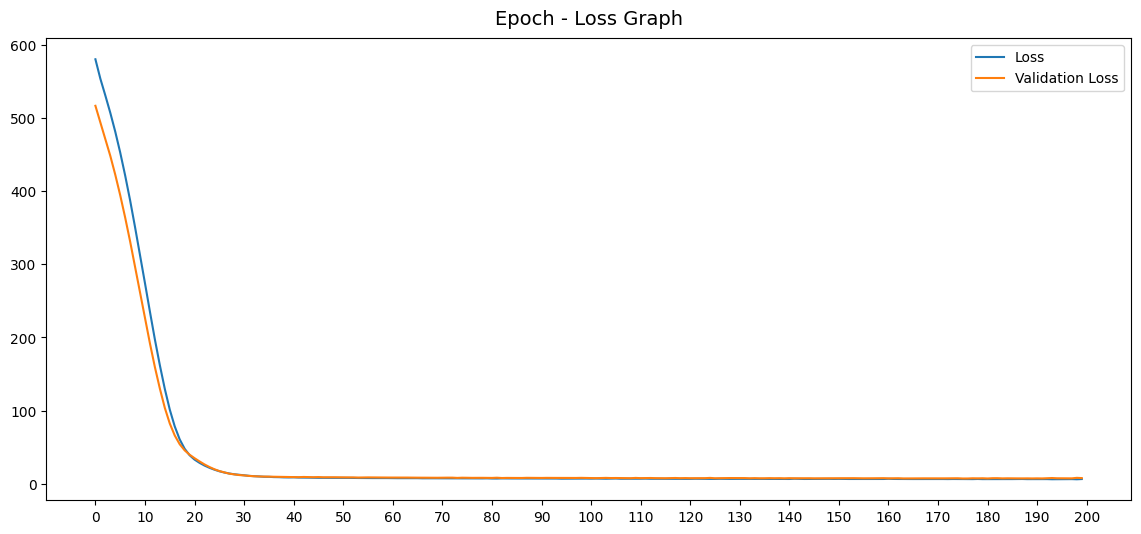

In [15]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Loss Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

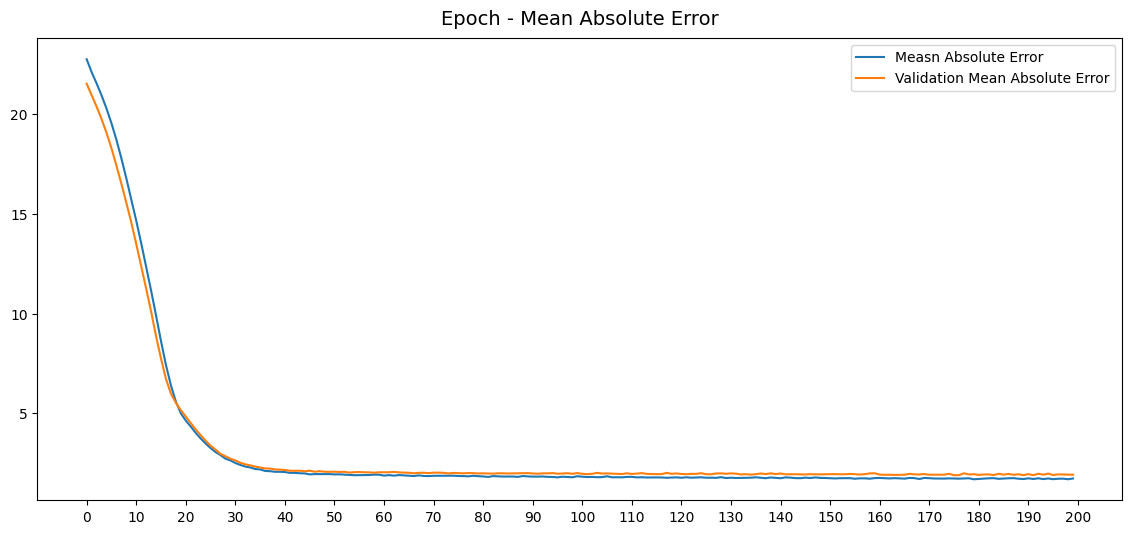

In [16]:
# auto-mpg
plt.figure(figsize=(14, 6))
plt.title('Epoch - Mean Absolute Error', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['mae'])
plt.plot(hist.epoch, hist.history['val_mae'])
plt.legend(['Measn Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [17]:
# auto-mpg
predict_df = pd.read_csv('predict.csv', header=None)
predict_df = pd.get_dummies(predict_df, columns=[6])
predict_dataset_x = predict_df.to_numpy() 
scaled_predict_dataset_x = ss.transform(predict_dataset_x)

predict_result = model.predict(scaled_predict_dataset_x)

for val in predict_result[:, 0]:
    print(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
16.844976
12.096133
12.1657505


In [ ]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Binary Accuracy Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

In [13]:
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

loss: 6.176600456237793
compile_metrics: 1.8335399627685547


In [ ]:
predict_dataset = np.array([[2 ,90, 68, 12, 120, 38.2, 0.503, 28],
                            [4, 111, 79, 47, 207, 37.1, 1.39, 56],
                            [3, 190, 65, 25, 130, 34, 0.271, 26],
                            [8, 176, 90, 34, 300, 50.7, 0.467, 58],
                            [7, 106, 92, 18, 200, 35, 0.300, 48]])

model.save('diabetes.h5')

from tensorflow.keras.models import load_model

model = load_model('diabetes.h5')

predict_result = model.predict(predict_dataset)
print(predict_result)

for result in predict_result[:, 0]:
    print('Şeker hastasi' if result > 0.5 else 'Şeker Hastasi Değil')